# Quel constructeur finit le plus souvent dernier des courses ?

* Traitement par python
* Transformation du dataframe en liste de listes pour traiter la question en python

In [ ]:
import pandas as pd

constructor_standings = pd.read_csv(
                'C:/DEVOIRS/ENSAI1A/projet-info/data/constructor_standings.csv'
                )
constructors = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/constructors.csv')

jointure = pd.merge(constructor_standings, constructors, on='constructorId', how='left')

jointure_liste = jointure.values.tolist()
jointure

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,8.0,3,3,0,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,9.0,2,2,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,5.0,4,4,0,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...,...,...,...,...,...,...
13266,28848,1132,15,0.0,10,10,0,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport
13267,28849,1132,210,27.0,7,7,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
13268,28850,1132,215,31.0,6,6,0,rb,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team
13269,28851,1132,3,4.0,9,9,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


In [134]:
constructeurs = pd.read_csv(
                'C:/DEVOIRS/ENSAI1A/projet-info/data/constructors.csv'
                )
constructeurs_liste = constructeurs.values.tolist()
nb_wins = {}
for i in range(len(constructeurs_liste)):
    nb_wins[constructeurs_liste[i][2]] = 0

for ligne in jointure_liste:
    if ligne[6] == 1:
        nb_wins[ligne[8]] += 1

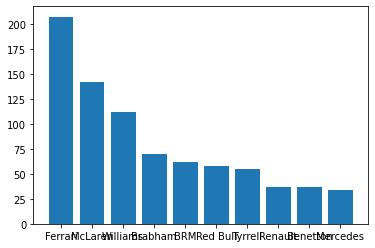

In [135]:
import matplotlib.pyplot as plt

def cle_des_n_indices_max(dico, n):
    dico_copie = dico.copy()
    liste_cle = []
    for i in range(n):
        maxi_i = 0
        cle_maxi_i = ''
        for cle in dico_copie:
            if dico_copie[cle] > maxi_i:
                maxi_i = dico_copie[cle]
                cle_maxi_i = cle
        liste_cle.append(cle_maxi_i)
        dico_copie.pop(cle_maxi_i, None)
    return liste_cle

cle_des_dix_indices_max = cle_des_n_indices_max(nb_wins, 10)
nb_wins_interessant = {cle_des_dix_indices_max[i] : nb_wins[cle_des_dix_indices_max[i]] for i in range(len(cle_des_dix_indices_max))}

plt.bar(range(len(nb_wins_interessant)), list(nb_wins_interessant.values()), align='center')
plt.xticks(range(len(nb_wins_interessant)), list(nb_wins_interessant.keys()))
plt.show()